In [2]:
from scipy.stats import norm
from scipy.stats import t
import numpy as np
import pandas as pd
from numpy.random import seed
import matplotlib.pyplot as plt

In [27]:
seed(47)

male_pop = int(5483/10)
female_pop = int(5742/10)

taproom_male_pop1 = 350
taproom_female_pop1 = 150

taproom_male_pop2 = 323
taproom_female_pop2 = 177

zip_pop = [1 for x in range(male_pop)] + [0 for x in range(female_pop)]
print(zip_pop[:5])
print(zip_pop[-5:])
print(male_pop+female_pop)
print(len(zip_pop))
print(f"Taproom Female Fraction 1: {taproom_female_pop1/(taproom_female_pop1+taproom_male_pop1)}")
print(f"Taproom Female Fraction 2: {taproom_female_pop2/(taproom_female_pop2+taproom_male_pop2)}")

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]
1122
1122
Taproom Female Fraction 1: 0.3
Taproom Female Fraction 2: 0.354


In [14]:
def bs_zip_sample(zip_pop, size):
    #returns female fraction
    return 1 - np.sum(np.random.choice(zip_pop, replace=True, size=size))/size

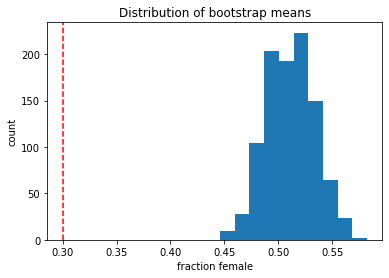

In [17]:
bs_zip_means = []

for i in range(1000):
    bs_zip_means.append(bs_zip_sample(zip_pop, taproom_male_pop1 + taproom_female_pop1))

_ = plt.hist(bs_zip_means, bins=int(np.sqrt(len(bs_zip_means)/10)))
_ = plt.xlabel('fraction female')
_ = plt.ylabel('count')
_ = plt.title('Distribution of bootstrap means')
_ = plt.axvline(taproom_female_pop1/(taproom_male_pop1 + taproom_female_pop1), color='r', linestyle='--')
plt.show()
    

In [18]:
print(f"Min female fraction: {np.min(bs_zip_means)}")

p = np.sum(np.array(bs_zip_means) < (taproom_female_pop1/(taproom_male_pop1 + taproom_female_pop1)))/len(bs_zip_means)
print(f"p = {p}")

Min female fraction: 0.44599999999999995
p = 0.0


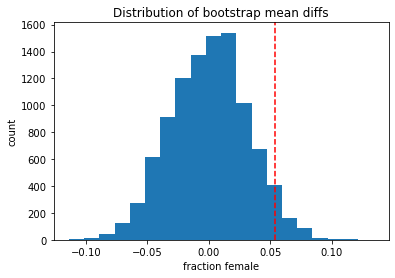

In [21]:
bs_zip_means_diff = []

for i in range(10000):
    bs_zip_means_diff.append(bs_zip_sample(zip_pop, taproom_male_pop1 + taproom_female_pop1) - bs_zip_sample(zip_pop, taproom_male_pop1 + taproom_female_pop1))

_ = plt.hist(bs_zip_means_diff, bins=int(np.sqrt(len(bs_zip_means_diff))/5))
_ = plt.xlabel('fraction female')
_ = plt.ylabel('count')
_ = plt.title('Distribution of bootstrap mean diffs')
_ = plt.axvline(taproom_female_pop2/(taproom_male_pop2 + taproom_female_pop2) - taproom_female_pop1/(taproom_male_pop1 + taproom_female_pop1), color='r', linestyle='--')
plt.show()

In [22]:
print(f"Max female fraction diff: {np.max(bs_zip_means_diff)}")

p = np.sum(np.array(bs_zip_means_diff) > taproom_female_pop2/(taproom_male_pop2 + taproom_female_pop2) - taproom_female_pop1/(taproom_male_pop1 + taproom_female_pop1))/len(bs_zip_means_diff)
print(f"p = {p}")

Max female fraction diff: 0.134
p = 0.044


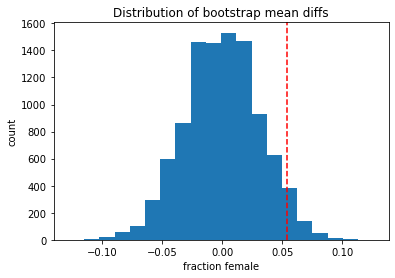

In [28]:
bs_zip_means_diff = []

for i in range(10000):
    bs_zip_means_diff.append(bs_zip_sample(zip_pop, taproom_male_pop1 + taproom_female_pop1) - bs_zip_sample(zip_pop, taproom_male_pop1 + taproom_female_pop1))

_ = plt.hist(bs_zip_means_diff, bins=int(np.sqrt(len(bs_zip_means_diff))/5))
_ = plt.xlabel('fraction female')
_ = plt.ylabel('count')
_ = plt.title('Distribution of bootstrap mean diffs')
_ = plt.axvline(taproom_female_pop2/(taproom_male_pop2 + taproom_female_pop2) - taproom_female_pop1/(taproom_male_pop1 + taproom_female_pop1), color='r', linestyle='--')
plt.show()

In [29]:
print(f"Max female fraction diff: {np.max(bs_zip_means_diff)}")

p = np.sum(np.array(bs_zip_means_diff) > taproom_female_pop2/(taproom_male_pop2 + taproom_female_pop2) - taproom_female_pop1/(taproom_male_pop1 + taproom_female_pop1))/len(bs_zip_means_diff)
print(f"p = {p}")

Max female fraction diff: 0.1260000000000001
p = 0.0466
